In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


The main of this is that we are gonna pick the best 12 recommendation using different techniques here ....

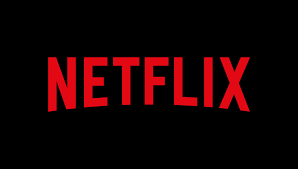

In [ ]:
data=pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [ ]:
data=data.fillna('')

In [ ]:
data.head()

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
desc=data['description'].values

In [ ]:
desc=list(desc)

In [ ]:
des=vectorizer.fit_transform(desc)

In [ ]:
des.shape

In [ ]:
cosine_sim = linear_kernel(des,des)

In [ ]:
cosine_sim.shape

In [ ]:
cosine_sim[1]

Let's consider the page size for the recommendation to be 12 and let's work with the 24 best recommendationsss and then choose the best 12 out of it

In [ ]:
def recommendation(name,cos=cosine_sim):
    idx=data[data['title']==name].index[0]
    top_24_idx = np.argsort(cos[idx])[-25:]
    top_24_idx=top_24_idx[::-1]
    top_24_idx=top_24_idx[1:]
    return data['title'].iloc[top_24_idx],top_24_idx
    
    

In [ ]:
movie=input('Please enter the movie name:')

In [ ]:
recommendation(movie)[0]

Now till here we have found out 24 total movies or tv shows based on the description ....

Now we can make this more detailed using the other features given to us

Let's make our own scoring system here which will decide what we can choose ....

If we try to find out the euclidian distance in this case we will be giving each and every feature equal importance in the choosing of the recommendation but in this case we can say that some of the features are more important to the users than the other features for example you will prefer to watch a movie from the same director so the feature of the director needs to be given more importance than the duration of the movie/tv show.

In [ ]:
rec_movies,ind=recommendation(movie)

In [ ]:
# Asking from users what they prefer (since users choices are of their own ...) Kinda like a filter ..
type=0
director=0
rating=0
listed=0
country=0
x=(input('If you wanna filter please enter yes else enter no:'))
if 'y' in x.lower():
    type=int(input('Type(movie/ Tv)'))
    director=int(input('You want same director :(1/0)'))
    rating=int(input('Do you want the same rating :(1/0)'))
    listed=int(input('Do you care about the same genre :(1/0)'))
    country=int(input('Do you want the movie of the same country:(1/0)'))
call=[type,director,country,rating,listed]

    

In [ ]:
def recom(ind=ind,movie=movie,call=call):
    score=[]
    for i in ind:
        sc=0
        a=data.iloc[i][1]
        b=data.iloc[i][3]
        c=data.iloc[i][5]
        d=data.iloc[i][8]
        e=data.iloc[i][10]
        a1=data[data['title']==movie].drop(columns=['show_id','cast','date_added','release_year','duration','description','title'],axis=1)['type'].values[0]
        b1=data[data['title']==movie].drop(columns=['show_id','cast','date_added','release_year','duration','description','title'],axis=1)['director'].values[0]
        c1=data[data['title']==movie].drop(columns=['show_id','cast','date_added','release_year','duration','description','title'],axis=1)['country'].values[0]
        d1=data[data['title']==movie].drop(columns=['show_id','cast','date_added','release_year','duration','description','title'],axis=1)['rating'].values[0]
        e1=data[data['title']==movie].drop(columns=['show_id','cast','date_added','release_year','duration','description','title'],axis=1)['listed_in'].values[0]
        if call[0]==0:
            if a==a1:
                sc+=1
        else:
            if a==a1:
                sc+=4
        if call[1]==0:
            if b==b1:
                sc+=1
        else:
            if b==b1:
                sc+=4
        if call[2]==0:
            x=c.split(',')
            for op in x:
                if op in c1:
                    sc+=1
                    break
        else:
            x=c.split(',')
            for op in x:
                if op in c1:
                    sc+=4
                    break
            
        if call[3]==0:
            if d==d1:
                sc+=1
        else:
            if d==d1:
                sc+=4
        if call[4]==0:
            x=e.split(',')
            for op in x:
                if op in e1:
                    sc+=1
                    break
        else:
            x=e.split(',')
            for op in x:
                if op in e1:
                    sc+=4
                    break
        score.append(sc)
    return score
            
            
            
            
        
        
    
    


In [ ]:
ans=recom()

In [ ]:
print('The 12 best of the recommendations i found are :')
top_12_idx = np.argsort(ans)[-12:]
top_12_idx=top_12_idx[::-1]
for i in top_12_idx:
    print(rec_movies.values[i])

In [ ]:
# Pretty different result i suppose

In [ ]:
data[data['title']=='Transformers: Robots in Disguise']

In [ ]:
data[data['title']=='Transformers Prime']

In [ ]:
#Hope you all liked this  :)

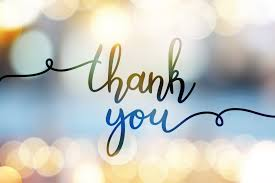